<a href="https://colab.research.google.com/github/sravya15280203/wheatflour-iron-detector/blob/main/iron_predictor_model_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:

!pip install pillow scikit-learn pandas matplotlib


In [2]:
import os
import numpy as np
import pandas as pd
from PIL import Image
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
csv_path = "/content/drive/My Drive/iron_flour_dataset.csv"
image_dir = "/content/drive/My Drive/wheat_flour_images"



In [3]:
df = pd.read_csv(csv_path)

# Convert PPM to classes
def ppm_to_class(ppm):
    if ppm < 10:
        return 0
    elif ppm < 20:
        return 1
    else:
        return 2

df["iron_class"] = df["iron_ppm"].apply(ppm_to_class)

# Feature extraction
def extract_features(image_path):
    img = Image.open(image_path).convert('L').resize((64, 64))
    return np.array(img).flatten() / 255.0



In [4]:
# Prepare features
X = np.array([extract_features(os.path.join(image_dir, img)) for img in df["image_name"]])
y = df["iron_class"].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)



In [5]:
# Train Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluation
acc = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')
cm = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {acc:.2f}")
print(f"Recall (macro avg): {recall:.2f}")
print("\nConfusion Matrix:")
print(cm)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.55
Recall (macro avg): 0.52

Confusion Matrix:
[[8 0 0]
 [7 0 0]
 [2 1 4]]

Classification Report:
              precision    recall  f1-score   support

           0       0.47      1.00      0.64         8
           1       0.00      0.00      0.00         7
           2       1.00      0.57      0.73         7

    accuracy                           0.55        22
   macro avg       0.49      0.52      0.46        22
weighted avg       0.49      0.55      0.46        22



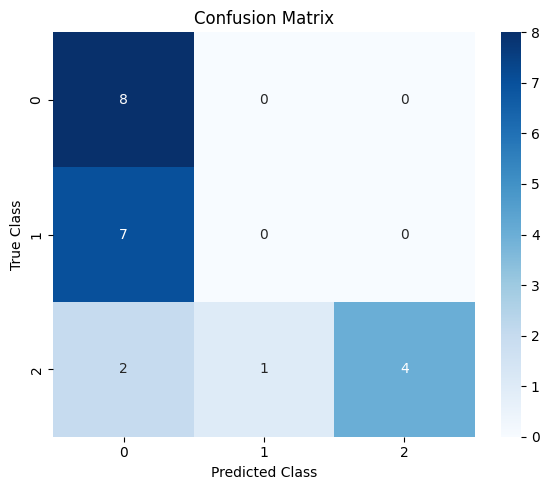

In [6]:
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1,2], yticklabels=[0,1,2])
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()


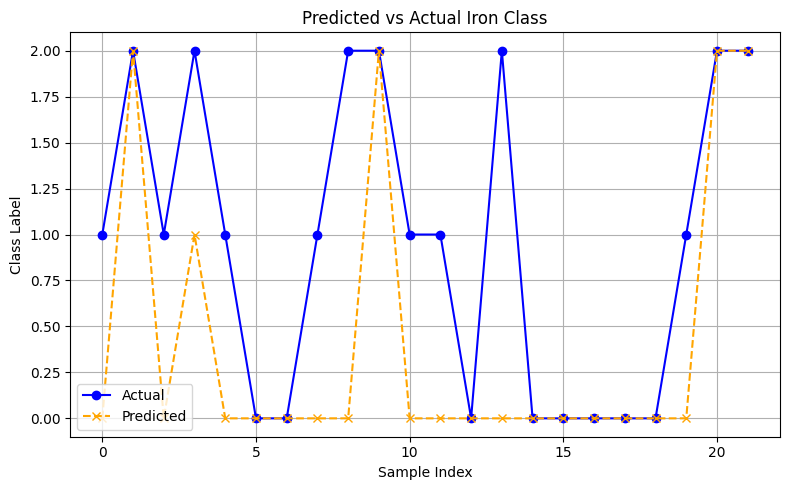

In [7]:
# Bar plot to compare predicted vs actual classes
plt.figure(figsize=(8, 5))
plt.plot(y_test, 'o-', label='Actual', color='blue')
plt.plot(y_pred, 'x--', label='Predicted', color='orange')
plt.xlabel("Sample Index")
plt.ylabel("Class Label")
plt.title("Predicted vs Actual Iron Class")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
